# E_1.08 Physics: Exercise 2 - Capacitor Charchinng/Discharging

- University: Rhein-Waal University of Applied Sciences (Hochschule Rhein-Waal)
- Course:  E_1.08 Physics: Mechanics, Electricity and Magentism, WS2022/23

## Overview
---

The following lab exercise aims to profile the characteristic curve of a capacitor in discharging/charging states.

## Extra software

Please Download [Arduino Legacy IDE](https://www.arduino.cc/en/software#legacy-ide-18x)

<center>
    <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/87/Arduino_Logo.svg/1024px-Arduino_Logo.svg.png" width="400px\"/>
    <br>
    <i></i>
</center>

## Background preparation before starting the lab
---

The following steps should have been done before startung the exercise:

- [Install Anaconda](https://docs.anaconda.com/anaconda/install/index.html)
- [Create the EEng Conda Environment](../EEng_LAB_Course_Preparation/eeng_conda_env.md)
- [Download Notebooks from Git Repo](https://github.com/rolfbecker/EE_1.08_2_EEng_LAB_WS2022)

## Safety Considerations
---

- **DO NOT** energize **ANY** circuit without prior review by the lab assistants, thay will make sure that the circuit is correctly connected, and if not, the will point out the necessary corrections.
- **DO NOT** drop or hit **ANY** components, especially measuring instruments such as the multimeter, Luxmeter, etc.

## List of Equipment
---

**Make sure you have all the components and instruments listed below before you start**.

Components:
- x1 100uF Capacitor
- x1 10K Ohm Resistor
- x1 Arduino UNO with cable
- Set of jumper cables

Instruments:
- x1 Multimeter

## Circuit
---

The diagrams below show the test circuit you must make for this exercise.

<div style="display: flex;">
  <div style="float: left; width: 33.33%; padding: 5px;">
      <center>
        <img src="./images/Capacitor_schem.png" width="400px"/>
        <br>
        <i></i>
      </center>
  </div>
  <div style="float: left; width: 33.33%; padding: 5px;">
      <center>
    <img src="./images/Capacitor_bb.png" width="600px"/>
    <br>
    <i></i>
      </center>
  </div>
</div>

## Flashing Arduino UNO

Open the file [Cap_Charging_Discharging_V003](./ex2/Arduino/Cap_Charging_Discharging_V003.ino) in the folder `Arduino`



## Data Capture
---

The data capture is done using Cap_Charging_Discharging_V003 `Arduino` code. 
- After installing and running the code on the board, open up the **Serial Monitor**. 
- Let the Arduino circuit run for at least **2 cycle** of charging and discharging.
- The data must be copied in a text file with extension `.txt.` inside the `data` folder, please follow the format of the `test.txt` file inside the `data` folder.

An example of how the file should be formatted:
<code style="margin: 10px 30px; display: block; color: grey; padding: 1em 2em ;">chargeMV,capacitorMV,digitalMV
5010,141,0
5010,288,0
5010,429,0
</code>

The first column of data corresponds to the **Voltage Output** $mV_{out}$ measured in **millivolt**<br>The second column is the **Voltage across Capacitor** $mV_{C}$ measured in **millivolt**<br>The third colum is the **Voltage Input** $mV_{in}$ measured in **millivolt**,

**Use the following file:** [myOwnData.txt](./data/myOwnData.txt)

## Data Display

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interactive

**Fill requested information**:

In [33]:
############################
# Fill these variables with
# the requested information
############################

FILE1_NAME = "charging2.txt"  # your file name WITH extension
FILE2_NAME = "discharging2.txt"  # your file name WITH extension

In [41]:
############################
# You do NOT need to change 
# anything in the section below
############################

FILE1_PATH = f"./data/{FILE1_NAME}"
FILE2_PATH = f"./data/{FILE2_NAME}"

df_charging = pd.read_csv(FILE1_PATH)
df_discharging = pd.read_csv(FILE2_PATH)
df_discharging.head()

,chargeMV,capacitorMV,digitalMV
0,0,4633,5000
1,0,4531,5000
2,0,4423,5000
3,0,4331,5000
4,0,4233,5000


## Numerical Analysis

In [42]:
# Capacitor voltage during charging
def V_charge(t, VS=1.0, R=1.e3, C=1.e-6):
    V = VS*(1-np.exp(-1/(R*C)*t))
    return(V)

In [43]:
# Capacitor voltage during discharging
def V_discharge(t, V0=1.0, R=1.e3, C=1.e-6):
    V = V0*np.exp(-1/(R*C)*t)
    return(V)

## Parameters

In [48]:
R = 10e3 # 10 kilo Ohm
C = 100e-6 # 1 micro Farad

V0 = VS = 5.01 # Output voltage produced by the Arduino UNO

## Characteristic Time of Charging and Discharging

The product of resistance and capacitance has the unit of time. It is the characteristic time of the problem: 

$$
t_c = RC
$$

In [49]:
# characteristic time constant
tc = R*C # s

print(f"The chractericstic time: t_c = R*C = {tc:.3f} s")

The chractericstic time: t_c = R*C = 1.000 s


## Time Range for Evaluation

In [50]:
#times to evaluate the functions at
t = np.arange(len(df_charging.chargeMV))*20/1000 # s

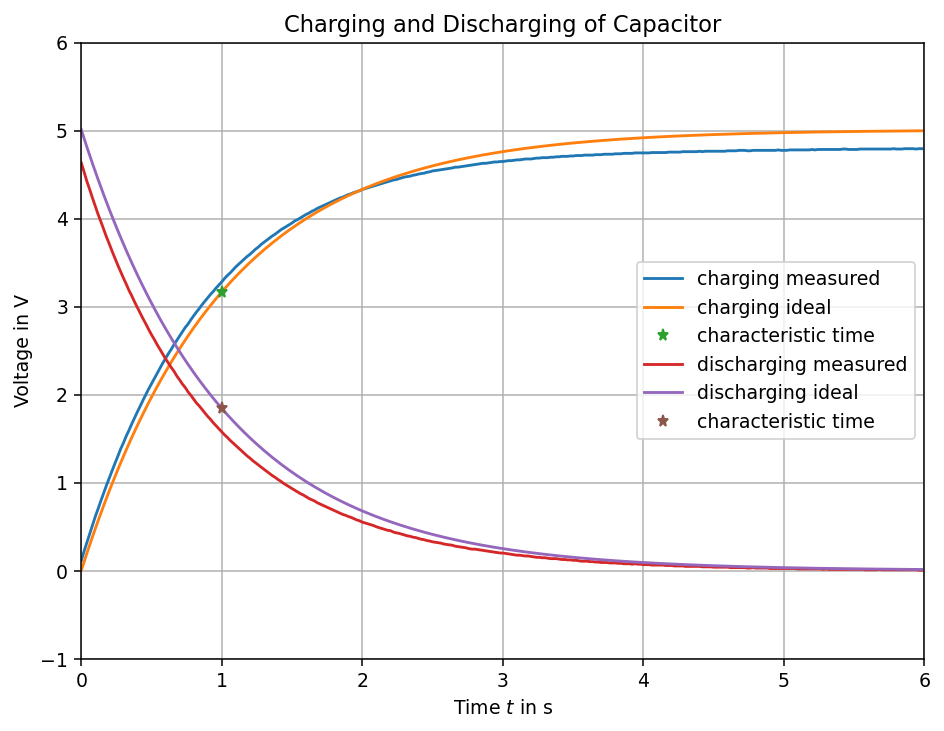

In [58]:
charging_V_C = df_charging.capacitorMV/1e3
discharging_V_C = df_discharging.capacitorMV/1e3

fig1, ax1 = plt.subplots(figsize=(8,6), dpi=136)
ax1.plot(t,charging_V_C, label="charging measured")
ax1.plot(t,V_charge(t,V0,R,C), label="charging ideal")
ax1.plot(tc,V_charge(tc,V0,R,C),"*", label ="characteristic time")

ax1.plot(t,discharging_V_C, label="discharging measured")
ax1.plot(t,V_discharge(t,V0,R,C), label="discharging ideal")
ax1.plot(tc,V_discharge(tc,V0,R,C),"*", label ="characteristic time")

ax1.set_xlabel("Time $t$ in s")
ax1.set_ylabel("Voltage in V")
ax1.set_title("Charging and Discharging of Capacitor")
ax1.set_xlim(0,6)
ax1.set_ylim(-1,6)
ax1.grid(True)
ax1.legend()
plt.plot()
plt.show()

## On a Log Scale

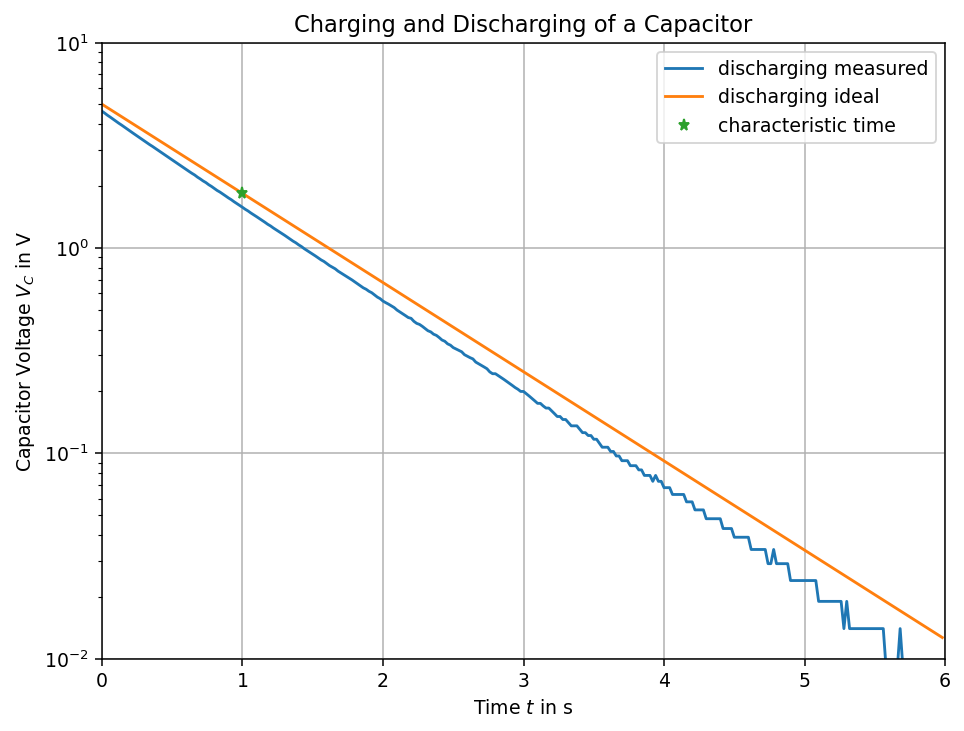

In [67]:
fig2, ax2 = plt.subplots(figsize=(8,6), dpi=136)

ax2.semilogy(t,discharging_V_C, label="discharging measured")
ax2.semilogy(t,V_discharge(t,V0,R,C), label="discharging ideal")
ax2.semilogy(tc,V_discharge(tc,V0,R,C),"*", label = "characteristic time")

ax2.set_xlabel("Time $t$ in s")
ax2.set_ylabel("Capacitor Voltage $V_C$ in V")
ax2.set_title("Charging and Discharging of a Capacitor")
ax2.set_xlim(0,6)
ax2.set_ylim(1e-2,1e1)
ax2.legend()
ax2.grid(True)
plt.plot()
plt.show()

In [83]:
def V_discharge_Model(t, V0=1.0, R=1.e3, C=1.e-6, m=-0.57, b=2.71e4):
    V = V0*np.exp(-1/(R*C)*t)
    return(b*V**m)

In [92]:
def plotter1(m=1., b=1.): # parameters with initial values

    fig2,ax2 = plt.subplots(figsize=(8,8))

    ax2.semilogy(t, discharging_V_C, "*")
    ax2.semilogy(t, V_discharge_Model(t,V0,R,C,m,b), "-")
    ax2.set_xlabel("Time $t$ in s")
    ax2.set_ylabel("Capacitor Voltage $V_C$ in V")
    ax2.set_title("Charging and Discharging of a Capacitor")
    ax2.set_xlim(0,6)
    ax2.set_ylim(1e-2,1e1)
    ax2.grid(True)

In [95]:
# initialize the interactive plot
iplot1 = interactive(
    plotter1, 
#    V0=(0.,10.,0.1),
#    R1=(5000.,15000.,100.),
    m=(0.2,1.6,0.01),
    b=(0., 6., .1)
)

# start the interactive plot
iplot1

interactive(children=(FloatSlider(value=1.0, description='m', max=1.6, min=0.2, step=0.01), FloatSlider(value=…